# Data Exploration 1

## <br>By Jean-Philippe Pitteloud</br>

### Requirements

In [1]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
%matplotlib inline

warnings.filterwarnings('ignore')

### Data Gathering

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

edu_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing 
engine.dispose()

In [3]:
edu_df.tail()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1487,2017_VIRGINIA,VIRGINIA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,248.041059,290.081407,227.598382,273.402640
1488,2017_WASHINGTON,WASHINGTON,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,241.701001,289.131257,223.123409,267.744778
1489,2017_WEST_VIRGINIA,WEST_VIRGINIA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,236.057019,273.415854,217.316396,271.617023
1490,2017_WISCONSIN,WISCONSIN,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.389213,288.143144,219.612694,258.700304
1491,2017_WYOMING,WYOMING,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.820619,288.761812,226.831211,269.371456


### Data Cleaning

In [4]:
edu_df_cleaned = edu_df.copy()

In [5]:
edu_df_cleaned.drop('PRIMARY_KEY', axis = 1, inplace = True)

In [6]:
edu_df_cleaned['STATE'] = edu_df_cleaned['STATE'].str.replace('_-_', '_')

edu_df_cleaned['bureau'] = edu_df_cleaned['STATE'].str.contains('^[B][UREAU]{5}\w+|^[B][I][E]?', case = False, regex = True)
edu_df_cleaned['STATE'] = np.where(edu_df_cleaned['bureau'], 'BUREAU_OF_INDIAN_EDUCATION', edu_df_cleaned['STATE'])
edu_df_cleaned.drop('bureau', axis = 1, inplace = True)

edu_df_cleaned['maria'] = edu_df_cleaned['STATE'].str.contains('NORTHERN_MARIANAS|COMMONWEALTH_OF_MARIANAS|MARIANAS|^[M][P]$', case = False, regex = True)
edu_df_cleaned['STATE'] = np.where(edu_df_cleaned['maria'], 'NORTHERN_MARIANA_ISLANDS', edu_df_cleaned['STATE'])
edu_df_cleaned.drop('maria', axis = 1, inplace = True)

edu_df_cleaned['dod'] = edu_df_cleaned['STATE'].str.contains('DEPARTMENT|DOD|DD', case = False, regex = True)
edu_df_cleaned['STATE'] = np.where(edu_df_cleaned['dod'], 'DEPARTMENT_OF_DEFENSE', edu_df_cleaned['STATE'])
edu_df_cleaned.drop('dod', axis = 1, inplace = True)

edu_df_cleaned['as'] = edu_df_cleaned['STATE'].str.contains('AMERICAN_SAMOA|^[A][S]', case = False, regex = True)
edu_df_cleaned['STATE'] = np.where(edu_df_cleaned['as'], 'AMERICAN_SAMOA', edu_df_cleaned['STATE'])
edu_df_cleaned.drop('as', axis = 1, inplace = True)

edu_df_cleaned['guam'] = edu_df_cleaned['STATE'].str.contains('GUAM|^[G][U]', case = False, regex = True)
edu_df_cleaned['STATE'] = np.where(edu_df_cleaned['guam'], 'GUAM', edu_df_cleaned['STATE'])
edu_df_cleaned.drop('guam', axis = 1, inplace = True)

edu_df_cleaned['pr'] = edu_df_cleaned['STATE'].str.contains('PUERTO_RICO|^[P][R]', case = False, regex = True)
edu_df_cleaned['STATE'] = np.where(edu_df_cleaned['pr'], 'PUERTO_RICO', edu_df_cleaned['STATE'])
edu_df_cleaned.drop('pr', axis = 1, inplace = True)

edu_df_cleaned['vi'] = edu_df_cleaned['STATE'].str.contains('VIRGIN_ISLANDS|^[V][I]$', case = False, regex = True)
edu_df_cleaned['STATE'] = np.where(edu_df_cleaned['vi'], 'VIRGIN_ISLANDS', edu_df_cleaned['STATE'])
edu_df_cleaned.drop('vi', axis = 1, inplace = True)

In [7]:
edu_df_cleaned.columns

Index(['STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE',
       'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE',
       'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',
       'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G',
       'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G',
       'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE',
       'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [8]:
columns = ['ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE',
       'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE',
       'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',
       'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G',
       'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G',
       'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE',
       'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'] 

states = edu_df_cleaned['STATE'].unique()

for state in states:
    edu_df_cleaned.loc[edu_df_cleaned['STATE'] == state, columns] = edu_df_cleaned.loc[edu_df_cleaned["STATE"] == state, columns].interpolate()

edu_df_cleaned.dropna(inplace=True)

In [9]:
edu_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 54 to 1491
Data columns (total 24 columns):
STATE                           1046 non-null object
YEAR                            1046 non-null int64
ENROLL                          1046 non-null float64
TOTAL_REVENUE                   1046 non-null float64
FEDERAL_REVENUE                 1046 non-null float64
STATE_REVENUE                   1046 non-null float64
LOCAL_REVENUE                   1046 non-null float64
TOTAL_EXPENDITURE               1046 non-null float64
INSTRUCTION_EXPENDITURE         1046 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1046 non-null float64
OTHER_EXPENDITURE               1046 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1046 non-null float64
GRADES_PK_G                     1046 non-null float64
GRADES_KG_G                     1046 non-null float64
GRADES_4_G                      1046 non-null float64
GRADES_8_G                      1046 non-null float64
GRADES_12_G                    

**1. Derive the descriptive statistics of the data and discuss the points that you think remarkable**

In [19]:
edu_df_cleaned.describe().iloc[:4,6:]

,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1.046000e+03,1.046000e+03,1.046000e+03,1046.000000,1.046000e+03,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1.046000e+03,1046.000000,1046.000000,1046.000000,1046.000000
mean,1.025869e+07,5.302625e+06,2.997572e+06,465925.866157,1.004152e+06,21407.926386,70590.249044,71534.228967,71677.377629,62567.048279,575159.107553,279757.934990,8.764167e+05,235.269162,278.747113,219.099817,263.615681
std,1.308992e+07,6.879720e+06,3.665806e+06,575722.727297,1.435778e+06,33167.593655,85100.439719,85272.286001,84302.592122,74919.819069,682406.034849,332560.468998,1.040403e+06,9.632646,9.912572,7.804302,5.768169
min,6.578090e+05,2.834840e+05,1.695450e+05,22636.000000,1.545200e+04,0.000000,3459.000000,2548.000000,1485.000000,484.000000,19226.000000,2758.000000,2.455400e+04,187.134670,232.831510,179.324956,236.379102


- Surprisingly, the average revenue from the Federal government is smaller than revenue perceived from at the State and Local levels.
- With respect to Expenses/Expenditure, on average the states spend most of the resources in INSTRUCTION compared to other channels
- On average, there is an increase in the grades in math and reading scores from fourth graders to eight graders taking the NAEP exams

**2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these two variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and informations around those dates**

In [20]:
edu_df_cali = edu_df_cleaned[edu_df_cleaned['STATE'] == 'CALIFORNIA']

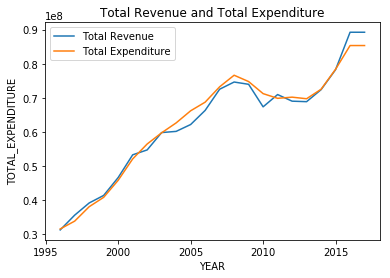

In [21]:
sns.lineplot(data = edu_df_cali, x = 'YEAR', y = "TOTAL_REVENUE", label="Total Revenue")

sns.lineplot(data = edu_df_cali, x = 'YEAR', y = "TOTAL_EXPENDITURE", label="Total Expenditure")

plt.title("Total Revenue and Total Expenditure")
plt.legend();

In the chart above, it is evident that the state of California experienced a sustained growth in both Revenue and Expenditure during the period between 1995 and 2008, however, a dramatic decrease was reported in 2010 due to a major budget crisis in the state that resulted in major cuts in the education budget for the state. Protest across the state at college and elementary school level were reported in news outlets (https://www.nytimes.com/2010/03/05/education/05protests.html)  

**3. In your chosen state, which one of the lessons the students are more successful, math or reading?**

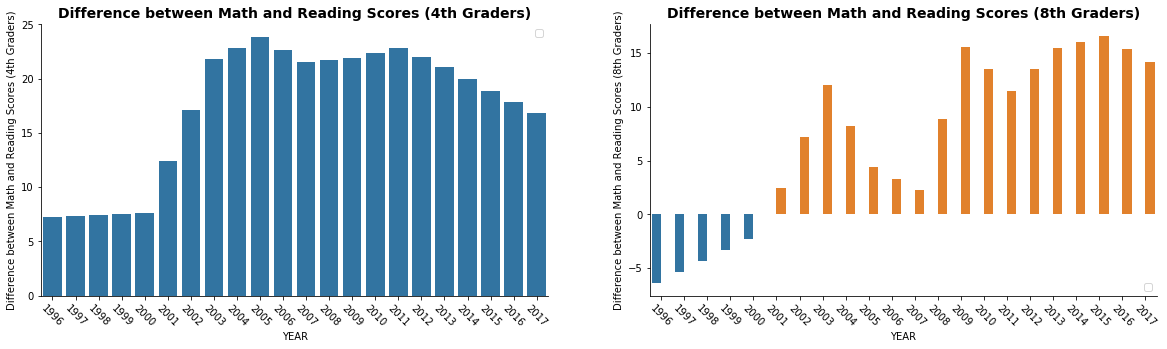

In [91]:
plt.figure(figsize = [20,5])

edu_df_cali['diff_4'] = (edu_df_cali['AVG_MATH_4_SCORE'] - edu_df_cali['AVG_READING_4_SCORE'])
edu_df_cali['sign_4'] = np.where(diff_4 > 0, 'pos', 'neg')

edu_df_cali['diff_8'] = (edu_df_cali['AVG_MATH_8_SCORE'] - edu_df_cali['AVG_READING_8_SCORE'])
edu_df_cali['sign_8'] = np.where(diff_8 > 0, 'pos', 'neg')

plt.subplot(1,2,1)
sns.barplot(data = edu_df_cali, x = 'YEAR', y = 'diff_4', hue = 'sign_4')
plt.title('Difference between Math and Reading Scores (4th Graders)', fontsize = 14, weight = 'bold')
plt.xticks(rotation = -45)
sns.despine()
plt.legend('')
plt.ylabel('Difference between Math and Reading Scores (4th Graders)')

plt.subplot(1,2,2)
sns.barplot(data = edu_df_cali, x = 'YEAR', y = 'diff_8', hue = 'sign_8')
plt.title('Difference between Math and Reading Scores (8th Graders)', fontsize = 14, weight = 'bold')
plt.xticks(rotation = -45)
sns.despine()
plt.legend('')
plt.ylabel('Difference between Math and Reading Scores (8th Graders)');

In the graphics above, the students of the state of California have been performing cosistently better in "Math" compared to "Reading" in the period between 2001-2017 at the 4th and 8th Grade level. However, in the period 1996-2000, 4th Graders steadily performed better in "Math" while 8th Graders had better results in "Reading"

**4. What are the distributions of the math and reading scores in the sample?**

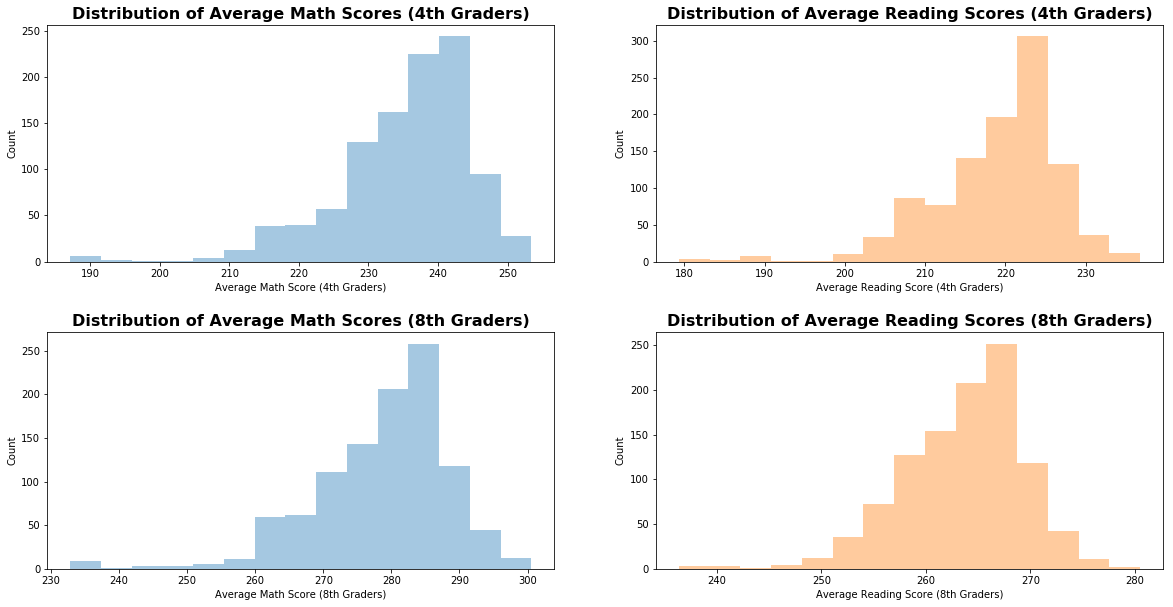

In [127]:
plt.figure(figsize = [20, 10])
plt.subplots_adjust(hspace = 0.3)

plt.subplot(2, 2, 1)
sns.distplot(edu_df_cleaned['AVG_MATH_4_SCORE'], kde = False, bins = 15, color = sns.color_palette()[0])
plt.title('Distribution of Average Math Scores (4th Graders)', fontsize = 16, weight = 'bold')
plt.xlabel('Average Math Score (4th Graders)')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
sns.distplot(edu_df_cleaned['AVG_READING_4_SCORE'], kde = False, bins = 15, color = sns.color_palette()[1])
plt.title('Distribution of Average Reading Scores (4th Graders)', fontsize = 16, weight = 'bold')
plt.xlabel('Average Reading Score (4th Graders)')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
sns.distplot(edu_df_cleaned['AVG_MATH_8_SCORE'], kde = False, bins = 15, color = sns.color_palette()[0])
plt.title('Distribution of Average Math Scores (8th Graders)', fontsize = 16, weight = 'bold')
plt.xlabel('Average Math Score (8th Graders)')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
sns.distplot(edu_df_cleaned['AVG_READING_8_SCORE'], kde = False, bins = 15, color = sns.color_palette()[1])
plt.title('Distribution of Average Reading Scores (8th Graders)', fontsize = 16, weight = 'bold')
plt.xlabel('Average Reading Score (8th Graders)')
plt.ylabel('Count');

From the plots above, it results evident that the values for "Average Math Scores" and "Average Reading Scores" for both 4th Graders and 8th Graders are not normally distributed and are consistently left skewed resulting in values for the mean lower than the median

**5. Notice that there are too many missing values for math and reading scores. Fill out the missing values using mean, median and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables**

This question does not apply to the dataset at hand. During the cleaning of the dataset described in a section above, all missing values in the corresponding variables were succesfully replaced using a state-by-state interpolation approach, and any remaining record missing values in any variable were removed from the dataset. Therefore, the working dataset does not report any missing value for the variables in question

In [128]:
edu_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 54 to 1491
Data columns (total 24 columns):
STATE                           1046 non-null object
YEAR                            1046 non-null int64
ENROLL                          1046 non-null float64
TOTAL_REVENUE                   1046 non-null float64
FEDERAL_REVENUE                 1046 non-null float64
STATE_REVENUE                   1046 non-null float64
LOCAL_REVENUE                   1046 non-null float64
TOTAL_EXPENDITURE               1046 non-null float64
INSTRUCTION_EXPENDITURE         1046 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1046 non-null float64
OTHER_EXPENDITURE               1046 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1046 non-null float64
GRADES_PK_G                     1046 non-null float64
GRADES_KG_G                     1046 non-null float64
GRADES_4_G                      1046 non-null float64
GRADES_8_G                      1046 non-null float64
GRADES_12_G                    